In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from lmfit.models import QuadraticModel, LorentzianModel, LinearModel
from lmfit import Model, Minimizer, Parameters, report_fit

import math

def findarg(data, value):
    arg = 0
    for wl in data:
        if wl<value:
            arg = arg + 1
        else:
            return arg
        
    return arg


data = pd.read_csv('sin_m3_3.csv')
nvModel = pd.read_csv('nv_model - EL2-98.csv')
radModel = pd.read_csv('gallium_model - EL2-98.csv')
sivModel = pd.read_csv('siv_model - EL2-98.csv')

In [2]:
regionMin = 625.5
regionMax = 792.5


# regionMin = 550
# regionMax = 850

argMin = findarg(data['W'], regionMin)
argMax = findarg(data['W'], regionMax)
# plt.rcParams.update({'font.size': 22})
# cm = 1/2.54 
# fig = plt.figure(figsize=(42.69*cm, 20.11*cm))
# plt.grid()
# plt.plot(data['W'][argMin:argMax],data['I'][argMin:argMax])

# Compare NV, siv model and data

In [3]:
Index = list(range(argMin, argMax))

# plt.rcParams.update({'font.size': 22})
# cm = 1/2.54 
# fig = plt.figure(figsize=(42.69*cm, 20.11*cm))
# plt.grid()
# plt.plot(data['W'][Index],data['I'][Index], label = 'data')
# plt.plot(nvModel['W'][Index],nvModel['I'][Index]*5, label = 'nv model')
# plt.plot(sivModel['W'][Index],sivModel['I'][Index]*5, label = 'siv model')
# plt.plot(radModel['W'][Index],radModel['I'][Index]*2, label = 'rad model')

# plt.legend()

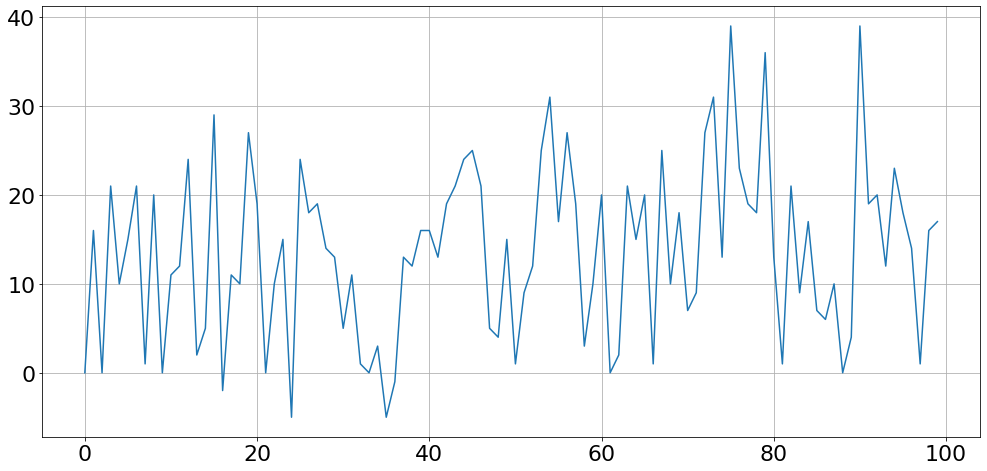

In [4]:
Index = list(range(argMin, argMax))
dataIndex = Index
nvIndex = Index
sivIndex = Index
radIndex = Index

plt.rcParams.update({'font.size': 22})
cm = 1/2.54 
fig = plt.figure(figsize=(42.69*cm, 20.11*cm))
plt.grid()
# plt.plot(data['I'][Index], label = 'data')
# plt.plot(nvModel['I'][Index]*5, label = 'nv model')
# plt.plot(sivModel['I'][Index]*5, label = 'siv model')
# plt.plot(radModel['I'][Index]*2, label = 'rad model')

plt.plot(nvModel['I'][0:100], label = 'nv model')

# plt.legend()

# Define Objective function

In [5]:
def fcn2min(params, x, data):
    """Model a quadradic background + nv & siv & irradiation signal and subtract data."""
    nv_amp = params['nv_amp']
    siv_amp = params['siv_amp']
    rad_amp = params['rad_amp']
    a = params['a']
    b = params['b']
    c = params['c']
    model = a*x**2+b*x+c
    # return model + nv_amp*nvModel['I'][nvIndex] + siv_amp*sivModel['I'][sivIndex] + rad_amp*radModel['I'][radIndex] - data
    # return model + nv_amp*nvModel['I'][874:2784] + siv_amp*sivModel['I'][874:2784] + rad_amp*radModel['I'][874:2784] - data
    return model + nv_amp*nvIntensity[nvIndex] + siv_amp*sivIntensity[sivIndex] + rad_amp*radIntensity[radIndex] - data

In [6]:
nvIntensity = np.array(nvModel['I'])
sivIntensity = np.array(sivModel['I'])
radIntensity = np.array(radModel['I'])
currentDataIntensity = np.array(data['I'])
currentDataWavelength = np.array(data['W'])


# create a set of Parameters
params = Parameters()
params.add('nv_amp', value=1, min=0)
params.add('siv_amp', value=1, min=0)
params.add('rad_amp', value=1, min=0)
# params.add('a', value=0, vary =  False)
params.add('a', value=0)
params.add('b', value=0)
params.add('c', value=0)

# do fit, here with the default leastsq algorithm
# minner = Minimizer(fcn2min, params, fcn_args=(currentData['W'][dataIndex], currentData['I'][dataIndex]))
# minner = Minimizer(fcn2min, params, fcn_args=(currentData['W'][874:2784], currentData['I'][874:2784]))
minner = Minimizer(fcn2min, params, fcn_args=(currentDataWavelength[dataIndex], currentDataIntensity[dataIndex]))


result = minner.minimize()

# calculate final result
# final = data + result.residual

# write error report
# report_fit(result)
# myfig=plt.figure(figsize=(15,15))
# plt.plot(data['W'][dataIndex], data['I'][dataIndex], '+', markersize = 20, label =  'data')
# plt.plot(data['W'][dataIndex], data['I'][dataIndex] + result.residual, label = 'fit')
# plt.plot(data['W'][dataIndex], result.params['nv_amp'].value*nvIntensity[dataIndex], label = 'nv_fit')
# plt.show()

# report_fit(result)
# plt.plot(wavel[Index], currentPL[Index], '+', label = 'data')
# plt.plot(wavel[Index], currentPL[Index] + result.residual, label = 'fit')
# plt.legend()
# plt.show()

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 36
    # data points      = 1910
    # variables        = 6
    chi-square         = 48246927.4
    reduced chi-square = 25339.7728
    Akaike info crit   = 19373.6398
    Bayesian info crit = 19406.9689
[[Variables]]
    nv_amp:   3.82889190 +/- 0.05058998 (1.32%) (init = 1)
    siv_amp:  1.38190895 +/- 0.00897502 (0.65%) (init = 1)
    rad_amp:  0.58893356 +/- 0.05142673 (8.73%) (init = 1)
    a:        0.15041910 +/- 0.00646553 (4.30%) (init = 0)
    b:       -235.703382 +/- 9.50975985 (4.03%) (init = 0)
    c:        92346.2617 +/- 3386.41348 (3.67%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(b, c)             = -0.999
    C(a, b)             = -0.998
    C(a, c)             = 0.995
    C(nv_amp, c)        = 0.951
    C(nv_amp, b)        = -0.944
    C(nv_amp, a)        = 0.928
    C(nv_amp, rad_amp)  = 0.824
    C(rad_amp, c)       = 0.694
    C(rad_amp, b)       = -0.667
    

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


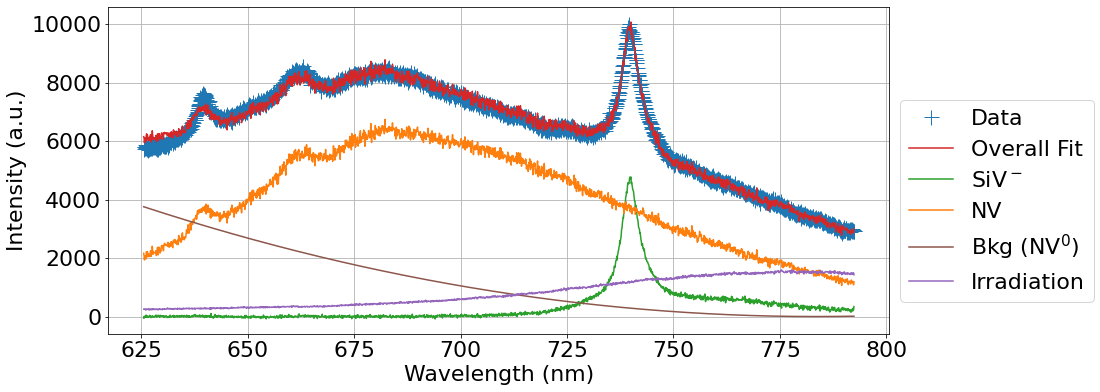

In [7]:
report_fit(result)
plt.rcParams.update({'font.size': 22})
cm = 1/2.54 
fig = plt.figure(figsize=(40*cm, 15*cm))

x = data['W'][dataIndex]
plt.plot(data['W'][dataIndex], data['I'][dataIndex], '+', markersize = 15, label =  'Data')
plt.plot(data['W'][dataIndex], data['I'][dataIndex] + result.residual, color = 'C3',label = 'Overall Fit')
plt.plot(data['W'][dataIndex], result.params['siv_amp'].value*sivIntensity[dataIndex], color = 'C2',label = 'SiV$^-$')
plt.plot(data['W'][dataIndex], result.params['nv_amp'].value*nvIntensity[dataIndex], color = 'C1',label = 'NV')
plt.plot(data['W'][dataIndex], result.params['a']*x**2+result.params['b']*x+result.params['c'], color = 'C5', label = 'Bkg (NV$^0$)')
plt.plot(data['W'][dataIndex], result.params['rad_amp'].value*radIntensity[dataIndex], color = 'C4', label = 'Irradiation')
plt.legend(bbox_to_anchor=(1, 0.75))

plt.ylabel('Intensity (a.u.)')
plt.xlabel('Wavelength (nm)')
plt.grid()
# plt.show()

plt.tight_layout()

fig.savefig('defect_fit_result sin_m3_3.eps', format= 'eps',transparent=True)
